In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3924,ham,As if i wasn't having enough trouble sleeping.,NaN,NaN,NaN
3848,ham,U in town alone?,NaN,NaN,NaN
3908,ham,Serious? What like proper tongued her,NaN,NaN,NaN
1394,ham,R we still meeting 4 dinner tonight?,NaN,NaN,NaN
4526,ham,Understand. his loss is my gain :) so do you w...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [13]:
df.sample(5)

,v1,v2
2710,spam,Hope you enjoyed your new content. text stop t...
2092,ham,"Oh, my love, it's soooo good to hear from you...."
5473,ham,Ok lor Ì_ reaching then message me.
2578,ham,Erm. I thought the contract ran out the4th of ...
1130,ham,Howz pain?hope u r fine..


In [15]:
df.rename(columns={'v1':'Type','v2':'Text_Message'},inplace=True)
df.sample(5)

,Type,Text_Message
1316,ham,Why nothing. Ok anyway give me treat
3066,ham,Ok. So april. Cant wait
5026,spam,PRIVATE! Your 2003 Account Statement for shows...
2449,ham,Then she dun believe wat?
1428,ham,"Tell you what, if you make a little spreadshee..."


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [18]:
df['Type']=encoder.fit_transform(df['Type'])

In [21]:
df.head()

,Type,Text_Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.isnull().sum()

Type            0
Text_Message    0
dtype: int64

In [25]:
df.duplicated().sum()

403

In [27]:
df=df.drop_duplicates(keep='first')

In [29]:
df.duplicated().sum()

0

In [31]:
df.shape

(5169, 2)

In [33]:
df.head()

,Type,Text_Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df['Type'].value_counts()

Type
0    4516
1     653
Name: count, dtype: int64

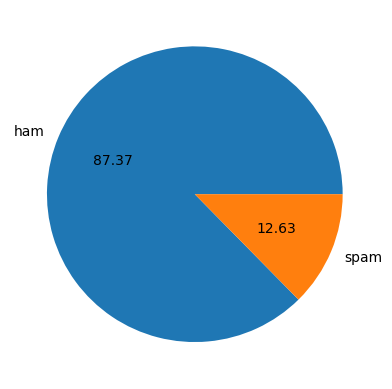

In [37]:
import matplotlib.pyplot as plt
plt.pie(df['Type'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [38]:
import nltk

In [41]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
 df['num_characters']=df['Text_Message'].apply(len)

In [44]:
df.head()

,Type,Text_Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [45]:
df['num_words']=df['Text_Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [51]:
df.head()

,Type,Text_Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [53]:
df['num_sentences']=df['Text_Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [55]:
df.head()

,Type,Text_Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [57]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [59]:
df[df['Type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [61]:
df[df['Type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [63]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

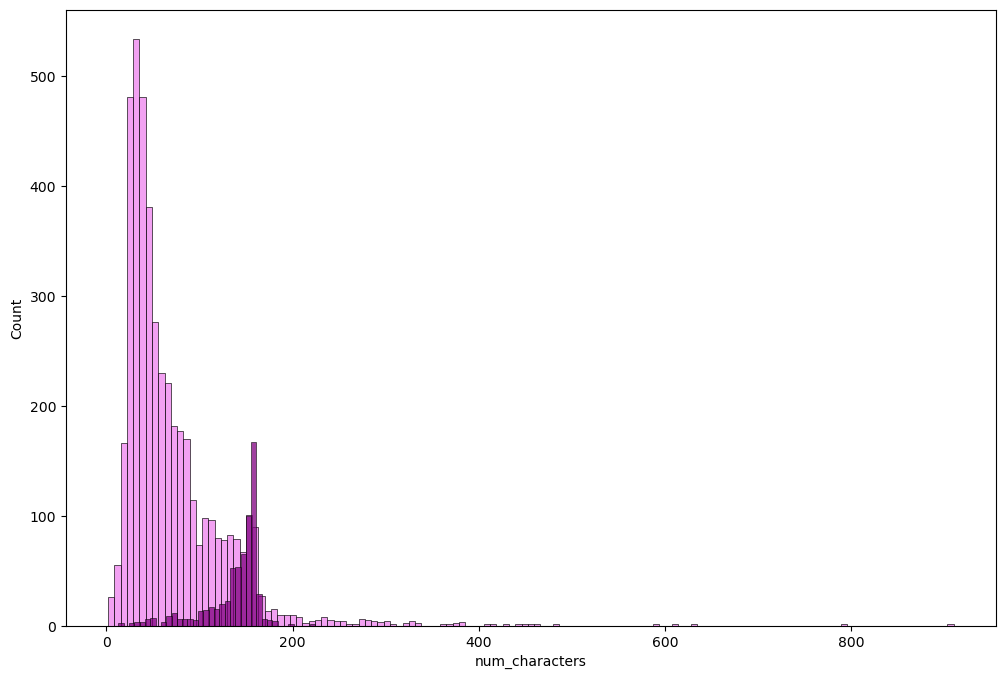

In [65]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Type']==0]['num_characters'],color='violet')
sns.histplot(df[df['Type']==1]['num_characters'],color='purple')

<Axes: xlabel='num_words', ylabel='Count'>

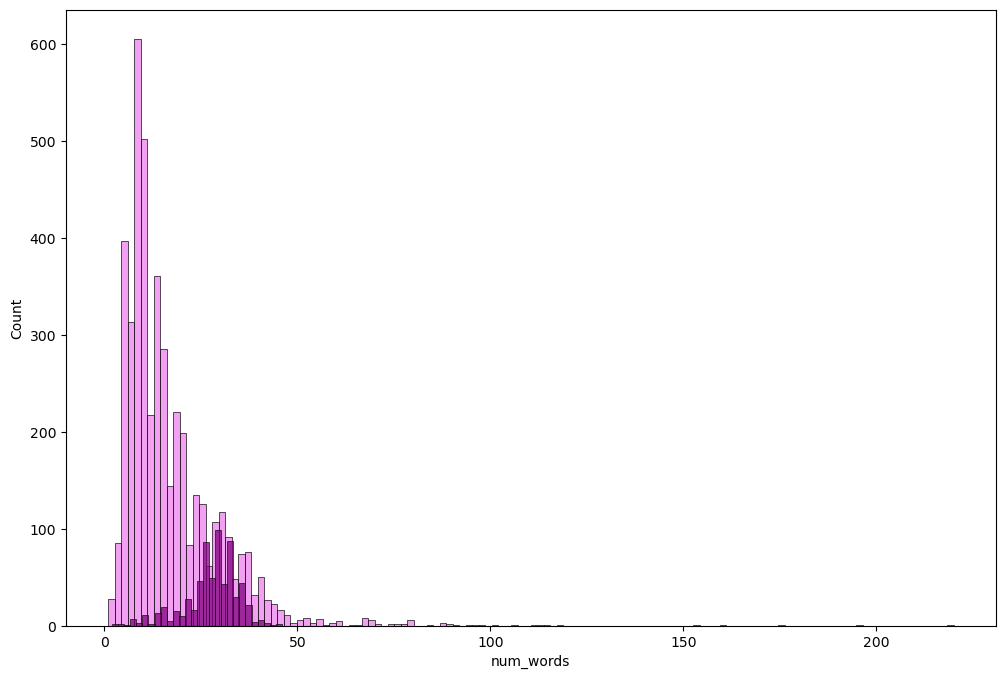

In [67]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Type']==0]['num_words'],color='violet')
sns.histplot(df[df['Type']==1]['num_words'],color='purple')

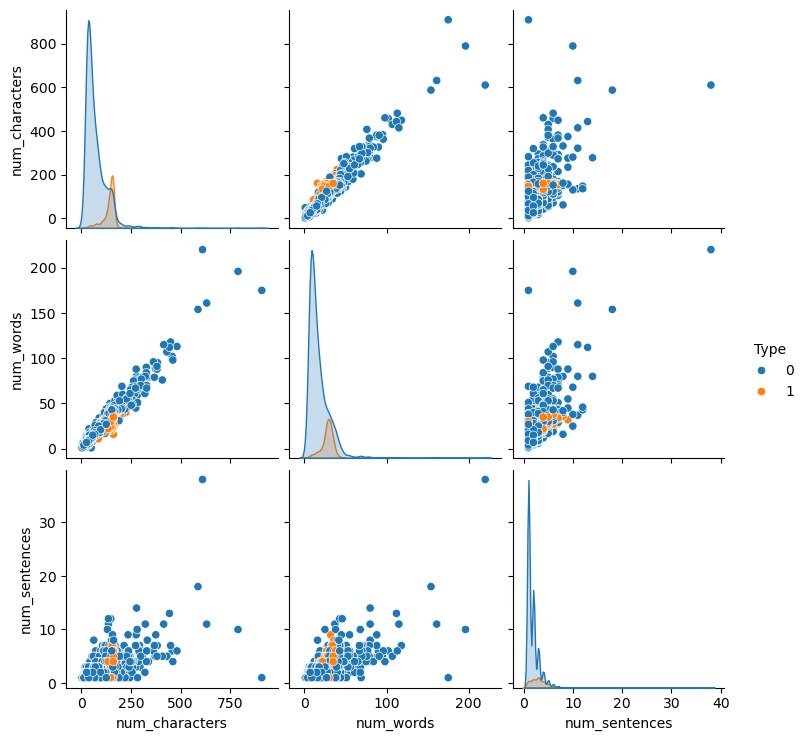

In [69]:
sns.pairplot(df,hue="Type")

<Axes: >

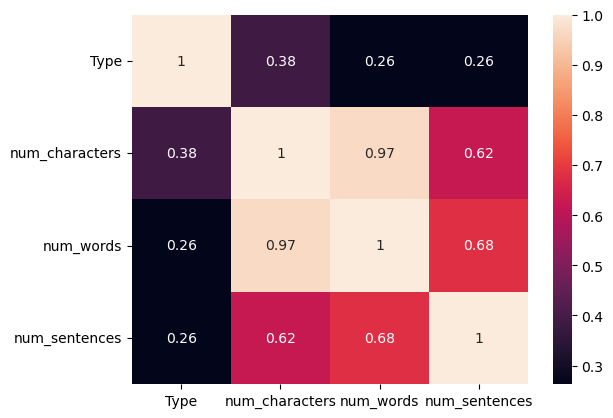

In [70]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [73]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [75]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [77]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [79]:
def transform_text(Text_Message):
    Text_Message=Text_Message.lower()
    Text_Message=nltk.word_tokenize(Text_Message)
    y=[]
    for i in Text_Message:
        if i.isalnum():
            y.append(i)
    Text_Message=y[:]
    y.clear()
    for i in Text_Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    Text_Message=y[:]
    y.clear()
    for i in Text_Message:
        y.append(ps.stem(i))
    return " ".join(y)

In [81]:
df['Transformed_Text']=df['Text_Message'].apply(transform_text)

In [82]:
df.head()

,Type,Text_Message,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [85]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [86]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [89]:
spam_wc=wc.generate(df[df['Type']==1]['Transformed_Text'].str.cat(sep=" "))

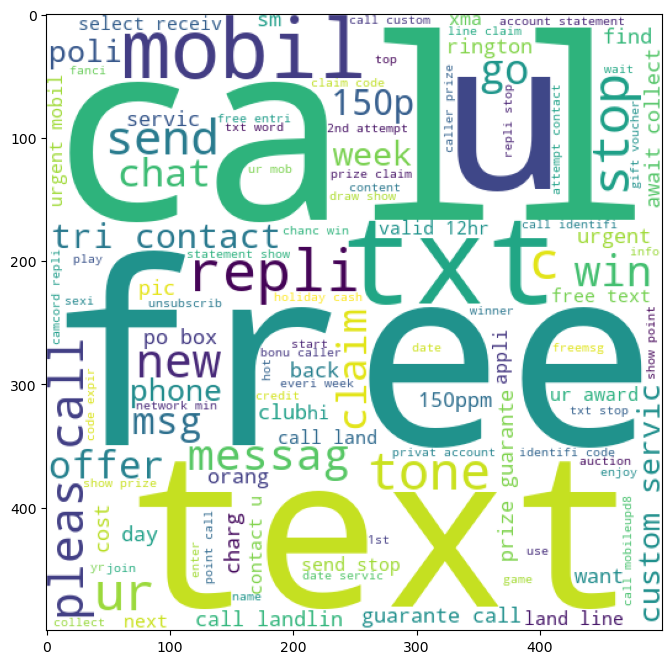

In [90]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [93]:
ham_wc=wc.generate(df[df['Type']==0]['Transformed_Text'].str.cat(sep=" "))

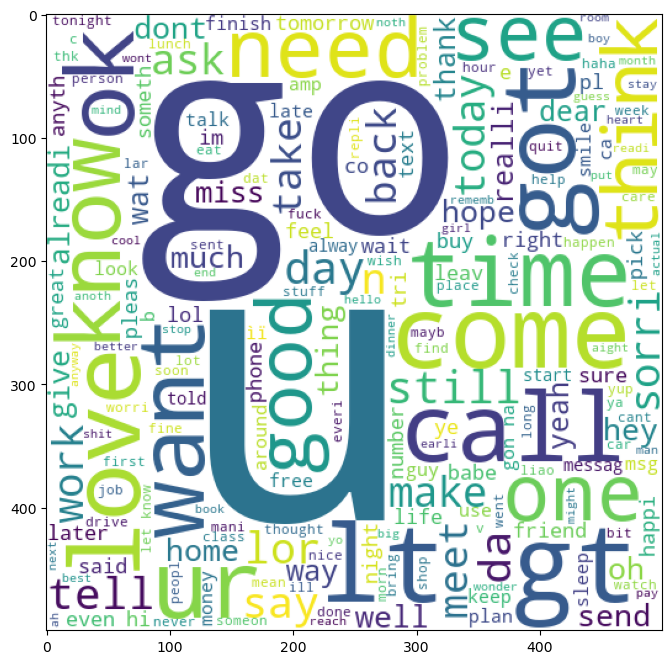

In [94]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [97]:
df.head()

,Type,Text_Message,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [99]:
spam_corpus=[]
for msg in df[df['Type']==1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [101]:
len(spam_corpus)

9939

C:\Users\HP\AppData\Local\Temp\ipykernel_18596\4002502897.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='pink')


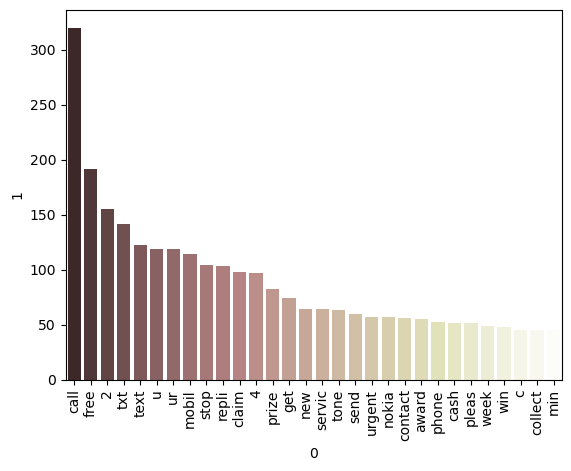

In [103]:
from collections import Counter
#df=pd.DataFrame({'1':'Count','0':'Top30_Words'})
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='pink')
plt.xticks(rotation='vertical')
plt.show()

In [105]:
ham_corpus=[]
for msg in df[df['Type']==0]['Transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [107]:
len(ham_corpus)

35404

C:\Users\HP\AppData\Local\Temp\ipykernel_18596\3815445712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='spring')


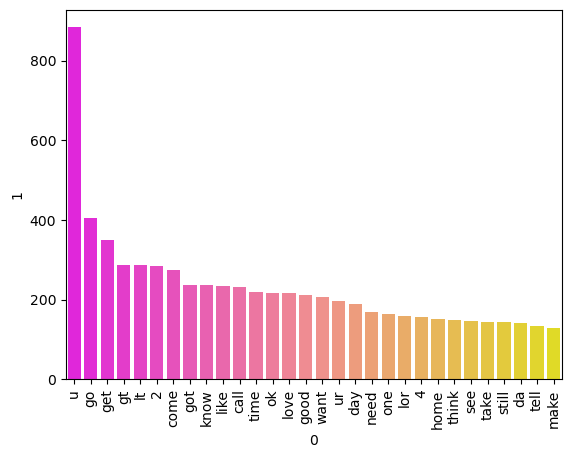

In [109]:
from collections import Counter
#df=pd.DataFrame({'1':'Count','0':'Top30_Words'})
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='spring')
plt.xticks(rotation='vertical')
plt.show()

In [219]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [221]:
X=tfidf.fit_transform(df['Transformed_Text']).toarray()

In [223]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(X)

In [225]:
X.shape

(5169, 3000)

In [227]:
y=df['Type'].values

In [229]:
from sklearn.model_selection import train_test_split

In [231]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [233]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [235]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [237]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print("accuracy score :\n",accuracy_score(Y_test,Y_pred1))
print("confusion matrix :\n",confusion_matrix(Y_test,Y_pred1))
print("precision_score :\n",precision_score(Y_test,Y_pred1))

accuracy score :
 0.8694390715667312
confusion matrix :
 [[788 108]
 [ 27 111]]
precision_score :
 0.5068493150684932


In [239]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print("accuracy score :\n",accuracy_score(Y_test,Y_pred2))
print("confusion matrix :\n",confusion_matrix(Y_test,Y_pred2))
print("precision_score :\n",precision_score(Y_test,Y_pred2))

accuracy score :
 0.9709864603481625
confusion matrix :
 [[896   0]
 [ 30 108]]
precision_score :
 1.0


In [215]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print("accuracy score :\n",accuracy_score(Y_test,Y_pred3))
print("confusion matrix :\n",confusion_matrix(Y_test,Y_pred3))
print("precision_score :\n",precision_score(Y_test,Y_pred3))

accuracy score :
 0.9835589941972921
confusion matrix :
 [[895   1]
 [ 16 122]]
precision_score :
 0.991869918699187


In [135]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [139]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [141]:
clfs = {
    'SVC' :svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'GBDT':gbdt,
    'xgb':xgb}

In [143]:
def train_classifier(clf,X_train,y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    precision=precision_score(Y_test,Y_pred)
    return accuracy,precision

In [145]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9758220502901354, 0.9747899159663865)

In [146]:
#from sklearn.linear_model import LogisticRegression
#clf=LogisticRegression(penalty='l2')

In [147]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,Y_train,X_test,Y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
precision -  1.0
For  NB
Accuracy -  0.9709864603481625
precision -  1.0
For  DT
Accuracy -  0.9303675048355899
precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
precision -  0.9829059829059829


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
precision -  0.8682170542635659
For  GBDT
Accuracy -  0.9468085106382979
precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
precision -  0.9262295081967213


In [150]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [153]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
9,xgb,0.967118,0.926230
8,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
3,DT,0.930368,0.817308


In [155]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [157]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.958414
5,AdaBoost,Accuracy,0.960348
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.930368


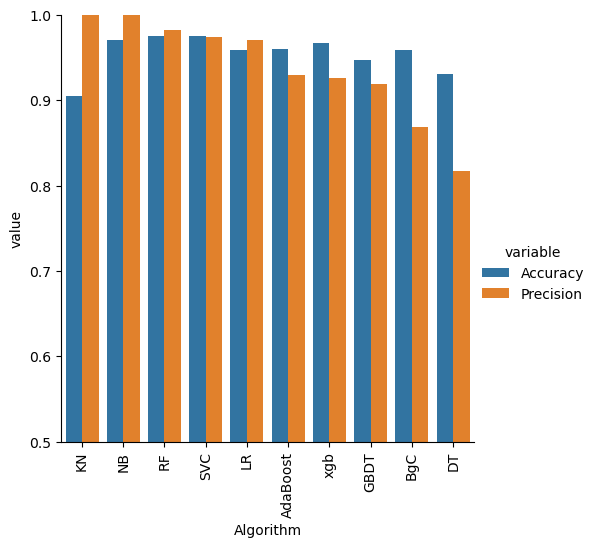

In [159]:
sns.catplot(x='Algorithm',y='value',
            hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [161]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [163]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [165]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [167]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [169]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [171]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.930368,0.817308,0.930368,0.817308,0.930368,0.817308,0.930368,0.817308


In [173]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [175]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [177]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [179]:
Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [181]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [183]:
from sklearn.ensemble import StackingClassifier

In [185]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [187]:
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [241]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))